### Datasets used for the project 
I. Energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013.

II. GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). 

III. [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. 

A new dataset is created by joining the three datasets: GDP, Energy, and ScimEn using the intersection of country names. Only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15) were used.


### Data cleaning and processing

In [1]:
# import numpy & pandas
import numpy as np
import pandas as pd

In [2]:
energy=pd.read_excel('Energy Indicators.xls', skiprows=18, skip_footer=38, header=None, na_values='...')
energy.drop([0,1],axis=1,inplace=True)
energy.rename(columns={2:'Country',3:'Energy Supply',4:'Energy Supply per Capita',5:'% Renewable'},inplace=True)
energy.head(4)

C:\Users\bista\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321.0,10.0,78.669280
1,Albania,102.0,35.0,100.000000
2,Algeria,1959.0,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026


In [3]:
import re
energy['Energy Supply']=energy['Energy Supply']*1000000
energy['Country'] = [re.sub(r'\d+', '', x) for x in energy['Country']]   ## remove the numbers within the names
energy['Country'] = energy['Country'].str.replace(" \(.*\)","")          ## fully remove the part of parenthesis

energy['Country']=energy['Country'].replace({'Republic of Korea':'South Korea','United States of America':'United States',
                                            'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                                            'China, Hong Kong Special Administrative Region':'Hong Kong'})

energy.tail(4)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
223,Wallis and Futuna Islands,0.0,26.0,0.00000
224,Yemen,344000000.0,13.0,0.00000
225,Zambia,400000000.0,26.0,99.71467
226,Zimbabwe,480000000.0,32.0,52.53612


In [4]:
GDP=pd.read_csv('world_bank.csv', header=4)

#GDP['Country Name']=GDP['Country Name'].replace({'Korea,Rep.':'South Korea','Iran,Islamic Rep.':'Iran','Hong Kong SAR,China':'Hong Kong'})
GDP['Country Name'] = GDP['Country Name'].replace('Korea, Rep.','South Korea')
GDP['Country Name'] = GDP['Country Name'].replace('Iran, Islamic Rep.','Iran')
GDP['Country Name'] = GDP['Country Name'].replace('Hong Kong SAR, China','Hong Kong')

columns = ['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
GDP=GDP[columns]
GDP[92:124]

,Country Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
92,High income,4.388929e+13,4.508225e+13,4.524197e+13,4.371168e+13,4.500457e+13,4.582233e+13,4.641099e+13,4.695969e+13,4.780469e+13,4.871938e+13
93,Hong Kong,2.019164e+11,2.149698e+11,2.195440e+11,2.141452e+11,2.286377e+11,2.396459e+11,2.437206e+11,2.512081e+11,2.577757e+11,2.638606e+11
94,Honduras,1.413979e+10,1.501480e+10,1.565017e+10,1.526961e+10,1.583934e+10,1.644689e+10,1.712593e+10,1.760401e+10,1.814714e+10,1.880683e+10
95,Heavily indebted poor countries (HIPC),3.701413e+11,3.947706e+11,4.188710e+11,4.376682e+11,4.630417e+11,4.855638e+11,5.130659e+11,5.422584e+11,5.725102e+11,6.000896e+11
96,Croatia,6.108881e+10,6.423489e+10,6.555387e+10,6.071351e+10,5.968062e+10,5.951277e+10,5.821097e+10,5.759165e+10,5.738407e+10,5.832781e+10
97,Haiti,6.523228e+09,6.741318e+09,6.798211e+09,7.007817e+09,6.622542e+09,6.988353e+09,7.189974e+09,7.495399e+09,7.705005e+09,7.832266e+09
98,Hungary,1.364672e+11,1.370483e+11,1.381986e+11,1.291340e+11,1.300938e+11,1.323802e+11,1.301444e+11,1.326038e+11,1.374733e+11,1.415135e+11
99,IBRD only,1.570602e+13,1.706738e+13,1.802426e+13,1.841893e+13,1.980252e+13,2.100183e+13,2.203042e+13,2.306945e+13,2.401157e+13,2.484141e+13
100,IDA & IBRD total,1.697394e+13,1.841843e+13,1.944638e+13,1.990883e+13,2.138217e+13,2.265753e+13,2.376510e+13,2.489885e+13,2.594497e+13,2.686382e+13
101,IDA total,1.270939e+12,1.353141e+12,1.424120e+12,1.493211e+12,1.582445e+12,1.657974e+12,1.736997e+12,1.832294e+12,1.937910e+12,2.027635e+12


In [5]:
ScimEn=pd.read_excel('scimagojr-3.xlsx')
ScimEn=ScimEn[ScimEn['Rank'] < 16]
ScimEn

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


In [6]:
# data-integrating
df=pd.merge(energy,ScimEn,how='inner',left_on='Country',right_on='Country')
dat=pd.merge(df,GDP,how='inner',left_on='Country',right_on='Country Name')
dat=dat.set_index('Country')
new_col=['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 
         'Energy Supply', 'Energy Supply per Capita', '% Renewable', 
         '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
dat=dat[new_col]

#### In order to answer the essential business questions, we first create a function to present the data for the top 15 countries by Scimagojr 'Rank'

In [7]:
def answer_one():
    import numpy as np
    import pandas as pd
    
    energy=pd.read_excel('Energy Indicators.xls', skiprows=18, skip_footer=38, header=None, na_values='...')
    energy.drop([0,1],axis=1,inplace=True)
    energy.rename(columns={2:'Country',3:'Energy Supply',4:'Energy Supply per Capita',5:'% Renewable'},inplace=True)
    
    import re
    energy['Energy Supply']=energy['Energy Supply']*1000000
    energy['Country'] = [re.sub(r'\d+', '', x) for x in energy['Country']]   ## remove the numbers within the names
    energy['Country'] = energy['Country'].str.replace(" \(.*\)","")          ## fully remove the part of parenthesis

    energy['Country']=energy['Country'].replace({'Republic of Korea':'South Korea','United States of America':'United States',
                                            'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                                            'China, Hong Kong Special Administrative Region':'Hong Kong'})
    
    GDP=pd.read_csv('world_bank.csv', header=4)

    # GDP['Country Name']=GDP['Country Name'].replace({'Korea,Rep.':'South Korea','Iran,Islamic Rep.':'Iran','Hong Kong SAR,China':'Hong Kong'})
    GDP['Country Name'] = GDP['Country Name'].replace('Korea, Rep.','South Korea')
    GDP['Country Name'] = GDP['Country Name'].replace('Iran, Islamic Rep.','Iran')
    GDP['Country Name'] = GDP['Country Name'].replace('Hong Kong SAR, China','Hong Kong')
    columns = ['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
    GDP=GDP[columns]
    
    ScimEn=pd.read_excel('scimagojr-3.xlsx')
    ScimEn=ScimEn[ScimEn['Rank'] < 16]
    
    df=pd.merge(energy,GDP,how='inner',left_on='Country',right_on='Country Name')
    dat=pd.merge(df,ScimEn,how='inner',left_on='Country',right_on='Country')
    dat=dat.set_index('Country')
    new_col=['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 
             'Energy Supply', 'Energy Supply per Capita', '% Renewable', 
             '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    dat=dat[new_col]
    return dat.sort_values('Rank',ascending=True)

answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


#### Here is a common question related to missing data - When joining the datasets as we reduced this to the top 15 items, how many entries did we lose?

#### We also create a function to answer the question.

In [8]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [9]:
def answer_two():
    ScimEn=pd.read_excel('scimagojr-3.xlsx')   # repeat the original
    outer_dat=len(pd.concat([energy['Country'],GDP['Country Name'],ScimEn['Country']]).unique())

    df=pd.merge(energy,GDP,how='inner',left_on='Country',right_on='Country Name')
    dat=pd.merge(df,ScimEn,how='inner',left_on='Country',right_on='Country')

    row_lose=outer_dat - dat.shape[0]
    return row_lose

answer_two()

156

#### We then focus on the data of the top 15 countries by Scimagojr Rank, and present the average GDP over the last 10 years for each of the countries. We'll exclude missing values from this calculation.

In [10]:
def answer_three():
    Top15 = answer_one()
    new_col=['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    Top15['avgGDP']=Top15[new_col].mean(axis=1,skipna=True)         ## exclude missing values
    avgGDP=Top15.sort_values('avgGDP',ascending=False)['avgGDP']    ## only display the last column
    return avgGDP

answer_three()

C:\Users\bista\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

#### There is a specific business question - By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP? Let's present the data as following:

In [11]:
def answer_four():
    Top15 = answer_one()
    new_col=['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    Top15['avgGDP']=Top15[new_col].mean(axis=1,skipna=True)         ## exclude missing values
    Top15['changed']=Top15['2015'] - Top15['2006']
    GDP_changed=Top15.sort_values('avgGDP',ascending=False)['changed'][5:6][0]
    return GDP_changed

answer_four()

C:\Users\bista\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


246702696075.3999

#### Here we calculate the mean of `Energy Supply per Capita`

In [12]:
def answer_five():
    Top15 = answer_one()
    return dat['Energy Supply per Capita'].mean()

#### If ask - What country has the maximum % Renewable and what is the percentage? We can simply present the data as following:

In [13]:
def answer_six():
    Top15 = answer_one()
    country, GDP = dat['% Renewable'].idxmax(), dat['% Renewable'].max()     
    return country, np.round(GDP,2)

answer_six()

C:\Users\bista\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


('Brazil', 69.65)

#### Also, if ask - What is the maximum value for this new column, and what country has the highest ratio? Let's create the following function:

In [14]:
def answer_seven():
    Top15 = answer_one()
    dat['ratio']=dat['Self-citations'] / dat['Citations']
    country, max_ratio = dat['ratio'].idxmax(), dat['ratio'].max() 
    return country, np.round(max_ratio, 2)

answer_seven()

C:\Users\bista\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


('China', 0.69)

#### We now answer - What is the third most populous country according to the population using Energy Supply and Energy Supply per capita?

In [15]:
def answer_eight():
    Top15 = answer_one()
    dat['populous']=dat['Energy Supply'] / dat['Energy Supply per Capita']
    third_pop=dat.sort_values('populous', ascending=False).iloc[2].name       ## display name of index
    return third_pop

answer_eight()

C:\Users\bista\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


'United States'

#### We're now to find the correlation between (two variables) the number of citable documents per capita and the energy supply per capita? 

#### We also like to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita

In [16]:
def answer_nine():
    Top15 = answer_one()
    #dat['populous']=dat['Energy Supply'] / dat['Energy Supply per Capita']
    dat['citable doc per capita'] = dat['Citable documents'] / dat['populous']
    corr=dat[['citable doc per capita', 'Energy Supply per Capita']].corr().iloc[0][1]
    return corr

answer_nine()

C:\Users\bista\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


0.7940010435442943

C:\Users\bista\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


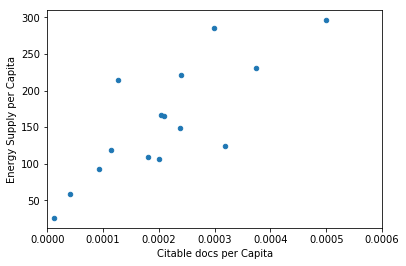

In [17]:
def plot_corr():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

plot_corr()

#### Statistical inference is generally our pupose. We now create a categorical variable with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

#### We also make the returned values sorting in ascending order of rank. Let's answer the business question in the following way:

In [18]:
Top15 = answer_one()
Top15.sort_values('Rank', ascending=True)

C:\Users\bista\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [19]:
def answer_ten():
    Top15 = answer_one()
    md=Top15['% Renewable'].median()
    Top15['HighRenew']=0
    Top15.loc[Top15['% Renewable'] >= md, 'HighRenew']=1
    high_renew=Top15.sort_values('Rank', ascending=True)['HighRenew']
    return high_renew
answer_ten()

C:\Users\bista\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

#### In order to present the sample size (the number of countries in each continent bin), we're now to create a dataframe which is also included the sum, mean, and std deviation for the estimated population of each country.

In [20]:
def answer_eleven():
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    Top15 = answer_one()
    Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita'])
    
    Top15 = Top15.reset_index()
    Top15['Continent'] = [ContinentDict[i] for i in Top15['Country']]
    Top15=Top15.set_index('Continent')           ## already convert to Dict's values
    
    ## using "agg" function
    df = Top15.groupby(level = 0)['PopEst'].agg({'size':np.size, 'sum':np.sum, 'mean':np.mean, 'std':np.std})
    new_df = df[['size', 'sum', 'mean', 'std' ]]
    return new_df

answer_eleven()

C:\Users\bista\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)
C:\Users\bista\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


,size,sum,mean,std
Continent,,,,
Asia,5.0,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


#### We can detail the last business question by cuting % Renewable into 5 bins, grouping Top15 by the Continent, as well as these new % Renewable bins.

#### We present the data as following:

In [21]:
def answer_twelve():
    ContinentDict = {'China':'Asia', 
                'United States':'North America', 
                'Japan':'Asia', 
                'United Kingdom':'Europe', 
                'Russian Federation':'Europe', 
                'Canada':'North America', 
                'Germany':'Europe', 
                'India':'Asia',
                'France':'Europe', 
                'South Korea':'Asia', 
                'Italy':'Europe', 
                'Spain':'Europe', 
                'Iran':'Asia',
                'Australia':'Australia', 
                'Brazil':'South America'}
    Top15 = answer_one()
    Top15 = Top15.reset_index()
    Top15['Continent'] = [ContinentDict[i] for i in Top15['Country']]
    ## Top15=Top15.set_index('Continent')           

    Top15['bins'] = pd.cut(Top15['% Renewable'],5)
    new_dat = Top15.groupby(['Continent', 'bins']).size()
    return new_dat

answer_twelve()

C:\Users\bista\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


Continent      bins            
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

In [22]:
Top15['% Renewable'].max(), Top15['% Renewable'].min()

(69.64803, 2.279353)

In [23]:
ContinentDict = {'China':'Asia', 
                'United States':'North America', 
                'Japan':'Asia', 
                'United Kingdom':'Europe', 
                'Russian Federation':'Europe', 
                'Canada':'North America', 
                'Germany':'Europe', 
                'India':'Asia',
                'France':'Europe', 
                'South Korea':'Asia', 
                'Italy':'Europe', 
                'Spain':'Europe', 
                'Iran':'Asia',
                'Australia':'Australia', 
                'Brazil':'South America'}
Top15 = answer_one()
#Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita'])
    
Top15 = Top15.reset_index()
Top15['Continent'] = [ContinentDict[i] for i in Top15['Country']]
## Top15=Top15.set_index('Continent')           

Top15['bins'] = pd.cut(Top15['% Renewable'],5)
ans = Top15.groupby(['Continent'])['bins'].count()
pd.Series(ans)
#Top15.head()

C:\Users\bista\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


Continent
Asia             5
Australia        1
Europe           6
North America    2
South America    1
Name: bins, dtype: int64

#### Lastly we convert the Population Estimate series to a string with thousands separator (using commas). Let's create the function.

In [24]:
Top15 = answer_one()
Top15.head()

C:\Users\bista\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12


In [25]:
def answer_thirteen():
    Top15 = answer_one()
    lister=list()
    Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita'])
    lister=Top15['PopEst'].tolist()

    #Top15=Top15.set_index('Country')
    #Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita']).apply(lambda x: "{:,}".format(x), lister)
    Top15['PopEst'] = (Top15['PopEst']).apply(lambda x: "{:,}".format(x), lister)
    name, pop = Top15.index.name, Top15['PopEst']
    return name, pop

answer_thirteen()

C:\Users\bista\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


('Country', Country
 China                 1,367,645,161.2903225
 United States          317,615,384.61538464
 Japan                  127,409,395.97315437
 United Kingdom         63,870,967.741935484
 Russian Federation            143,500,000.0
 Canada                  35,239,864.86486486
 Germany                 80,369,696.96969697
 India                 1,276,730,769.2307692
 France                  63,837,349.39759036
 South Korea            49,805,429.864253394
 Italy                  59,908,256.880733944
 Spain                    46,443,396.2264151
 Iran                    77,075,630.25210084
 Australia              23,316,017.316017315
 Brazil                 205,915,254.23728815
 Name: PopEst, dtype: object)

### Final Visualization & Creation of "Plot_Optional"

C:\Users\bista\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


This is a visualization created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


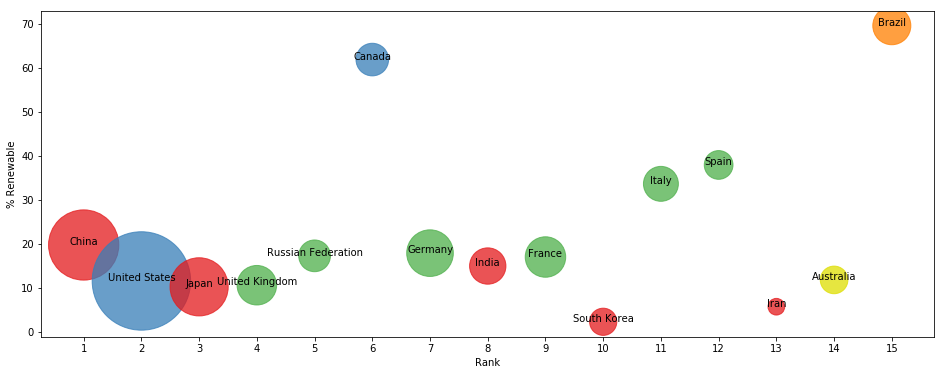

In [26]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    
    ## using color theme code
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is a visualization created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")
    
plot_optional()